In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.ensemble import IsolationForest

from sklearn.utils import check_X_y

from pyod.models.ocsvm import OCSVM
from pyod.utils.data import generate_data
from pyod.utils.data import get_color_codes
from pyod.utils.data import evaluate_print

import matplotlib.font_manager
from sklearn import svm

In [12]:
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
def visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True,
              save_figure=False):  # pragma: no cover
    """
    Utility function for visualizing the results in examples
    Internal use only
    :param clf_name: The name of the detector
    :type clf_name: str
    :param X_train: The training samples
    :param X_train: numpy array of shape (n_samples, n_features)
    :param y_train: The ground truth of training samples
    :type y_train: list or array of shape (n_samples,)
    :param X_test: The test samples
    :type X_test: numpy array of shape (n_samples, n_features)
    :param y_test: The ground truth of test samples
    :type y_test: list or array of shape (n_samples,)
    :param y_train_pred: The predicted outlier scores on the training samples
    :type y_train_pred: numpy array of shape (n_samples, n_features)
    :param y_test_pred: The predicted outlier scores on the test samples
    :type y_test_pred: numpy array of shape (n_samples, n_features)
    :param show_figure: If set to True, show the figure
    :type show_figure: bool, optional (default=True)
    :param save_figure: If set to True, save the figure to the local
    :type save_figure: bool, optional (default=False)
    """

    if X_train.shape[1] != 2 or X_test.shape[1] != 2:
        raise ValueError("Input data has to be 2-d for visualization. The "
                         "input data has {shape}.".format(shape=X_train.shape))

    X_train, y_train = check_X_y(X_train, y_train)
    X_test, y_test = check_X_y(X_test, y_test)
    c_train = get_color_codes(y_train)
    c_test = get_color_codes(y_test)

    fig = plt.figure(figsize=(12, 10))
    plt.suptitle("Demo of {clf_name}".format(clf_name=clf_name))

    fig.add_subplot(221)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
    plt.title('Train ground truth')
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='normal',
                              markerfacecolor='b', markersize=8),
                       Line2D([0], [0], marker='o', color='w', label='outlier',
                              markerfacecolor='r', markersize=8)]

    plt.legend(handles=legend_elements, loc=4)

    fig.add_subplot(222)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=c_test)
    plt.title('Test ground truth')
    plt.legend(handles=legend_elements, loc=4)

    fig.add_subplot(223)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred)
    plt.title('Train prediction by {clf_name}'.format(clf_name=clf_name))
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='normal',
                              markerfacecolor='0', markersize=8),
                       Line2D([0], [0], marker='o', color='w', label='outlier',
                              markerfacecolor='yellow', markersize=8)]
    plt.legend(handles=legend_elements, loc=4)

    fig.add_subplot(224)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred)
    plt.title('Test prediction by {clf_name}'.format(clf_name=clf_name))
    plt.legend(handles=legend_elements, loc=4)

    if save_figure:
        plt.savefig('{clf_name}.png'.format(clf_name=clf_name), dpi=300)
    if show_figure:
        plt.show()
    return

In [3]:
def demo_anomaly_detection_2d (contamination = 0.1, n_train = 200, n_test = 100,
                              clf_name = 'OneClassSVM',
                              clf = OCSVM()):

    # Generate sample data
    X_train, y_train, X_test, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)
    # train classifier
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)

/home/vinh/anaconda3/envs/barco3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vinh/anaconda3/envs/barco3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vinh/anaconda3/envs/barco3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multid


On Training Data:
OneClassSVM ROC:0.9992, precision @ rank n:0.95

On Test Data:
OneClassSVM ROC:1.0, precision @ rank n:1.0


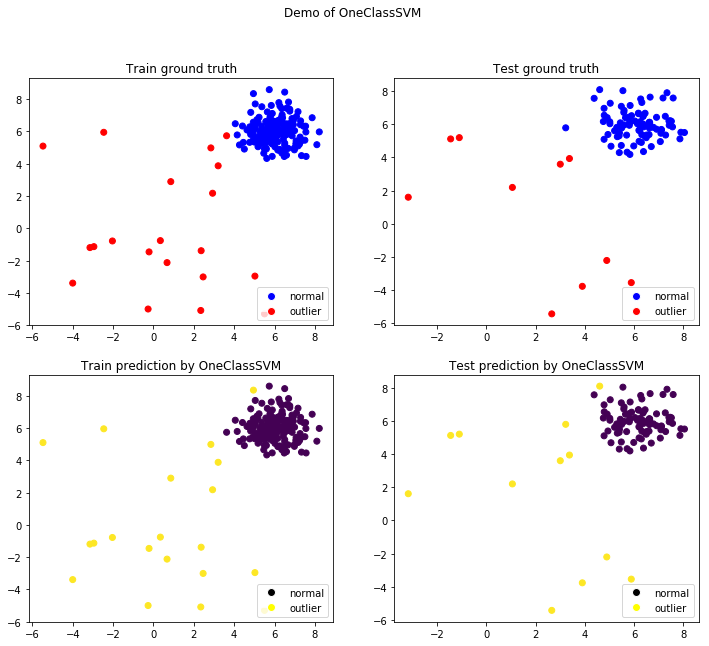

In [4]:
demo_anomaly_detection_2d ()

In [5]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

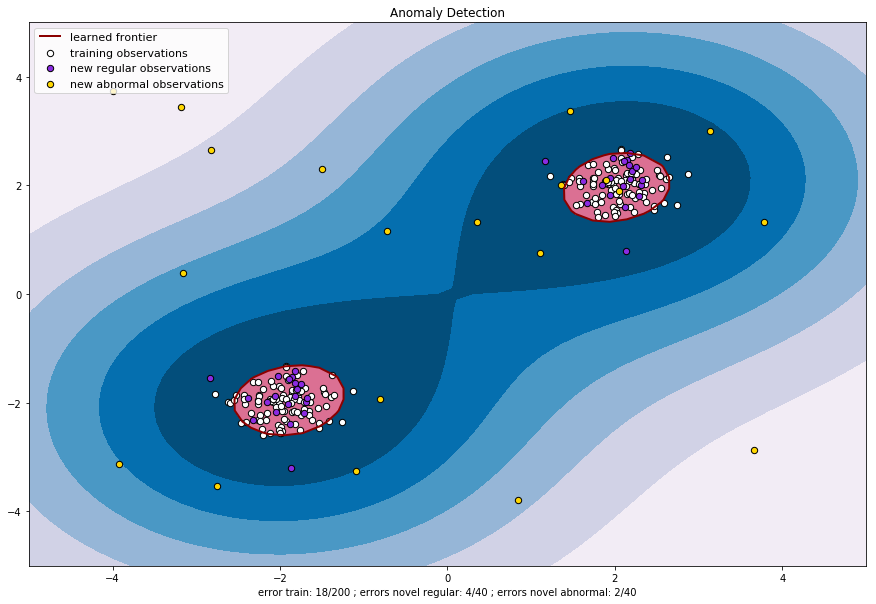

In [14]:
# One-class SVM
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Anomaly Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

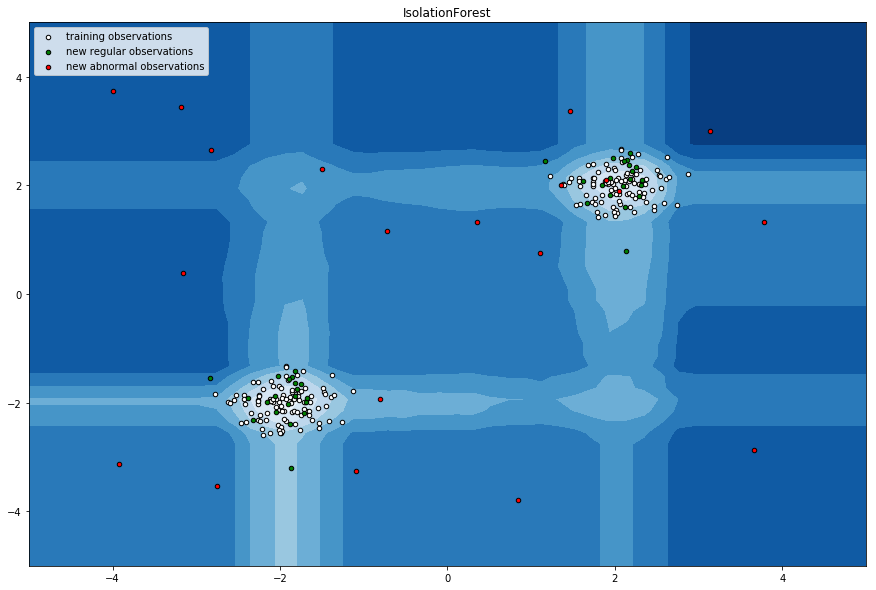

In [13]:
# IsolationForest
rng = np.random.RandomState(42)

# fit the model
clf = IsolationForest( max_samples=100,
                      random_state=rng, contamination='auto', behaviour='new')
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()